In [4]:
import pandas as pd
import scipy.optimize as sco
import math
import sympy as sp

In [5]:
# считаем количество двоечников, хорошистов, отличников в датасете
def f(data):
    ret = [0] * 3
    for i in range(1, 10):
        cnt = data[str(i)][0]
        if i <= 4:
            ret[0] += cnt
        elif i <= 6:
            ret[1] += cnt
        else:
            ret[2] += cnt
    return ret

In [6]:
#-ln(L)
def L(arr_var, arr_par):
    return -arr_par[2] * math.log(arr_var[0]) - arr_par[1] * math.log(arr_var[1]) \
        - arr_par[2] * math.log(1 - arr_var[1] - arr_var[0])

In [7]:
def main():
    #читаем данные
    data = pd.read_csv("test.csv")

    #переводим в удобный формат
    nwdata = f(data)

    #считаем ОМП, получаем одновременно и обратный гессиан
    res = sco.minimize(L, x0=[0.1, 0.1], args=(nwdata, ), bounds=((1e-6, 0.5 - 1e-6), (1e-6, 0.5 - 1e-6)))
    inv_hess = res.hess_inv.todense()

    #обращаем гессиан
    det = inv_hess[0][0] * inv_hess[1][1] - inv_hess[0][1] * inv_hess[1][0]
    hess = [[inv_hess[1][1] / det, inv_hess[0][1] / det], [inv_hess[1][0] / det, inv_hess[0][0] / det]]

    p1 = res.x[0]
    p2 = res.x[1]

    #рисуем эллипсоид
    sp.var('x y')
    sp.plot_implicit(
        hess[0][0] * (x - p1) ** 2 + (hess[0][1] + hess[1][0]) * (x - p1) * (y - p2) + hess[1][1] * (y - p2) ** 2 < 5.99
        , x_var=(x, 0, 1), y_var=(y, 0, 1)
    )

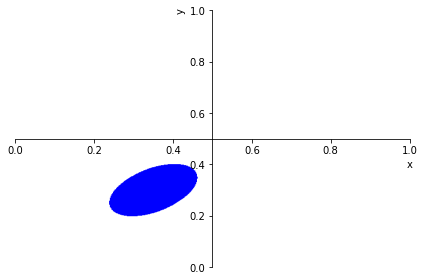

In [8]:
main()